In [1]:
!python -m pip install -e ..

Obtaining file:///Users/asmazzeo/Documents/UTN/Proyecto%20FInal/Frontier-Exploration-with-a-prior
  Preparing metadata (setup.py) ... done
  Attempting uninstall: FrontierExploration
    Found existing installation: FrontierExploration 1.0.0
    Uninstalling FrontierExploration-1.0.0:
      Successfully uninstalled FrontierExploration-1.0.0
  Running setup.py develop for FrontierExploration

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import pickle
from matplotlib import pyplot as plt

base_dir = os.getcwd()
# file_dir = f"{base_dir}/files/planta_murguiondo_grid.pkl"
file_dir = f"{base_dir}/files/small_house_grid.pkl"


with open(file_dir, "rb") as file:
    grid = pickle.load(file)

 96%|██████████████████████████████████████████████████████████████████████████████████████████▍   | 892/927 [00:28<00:01, 30.94it/s]


The robot should take 460 steps to explore the grid.


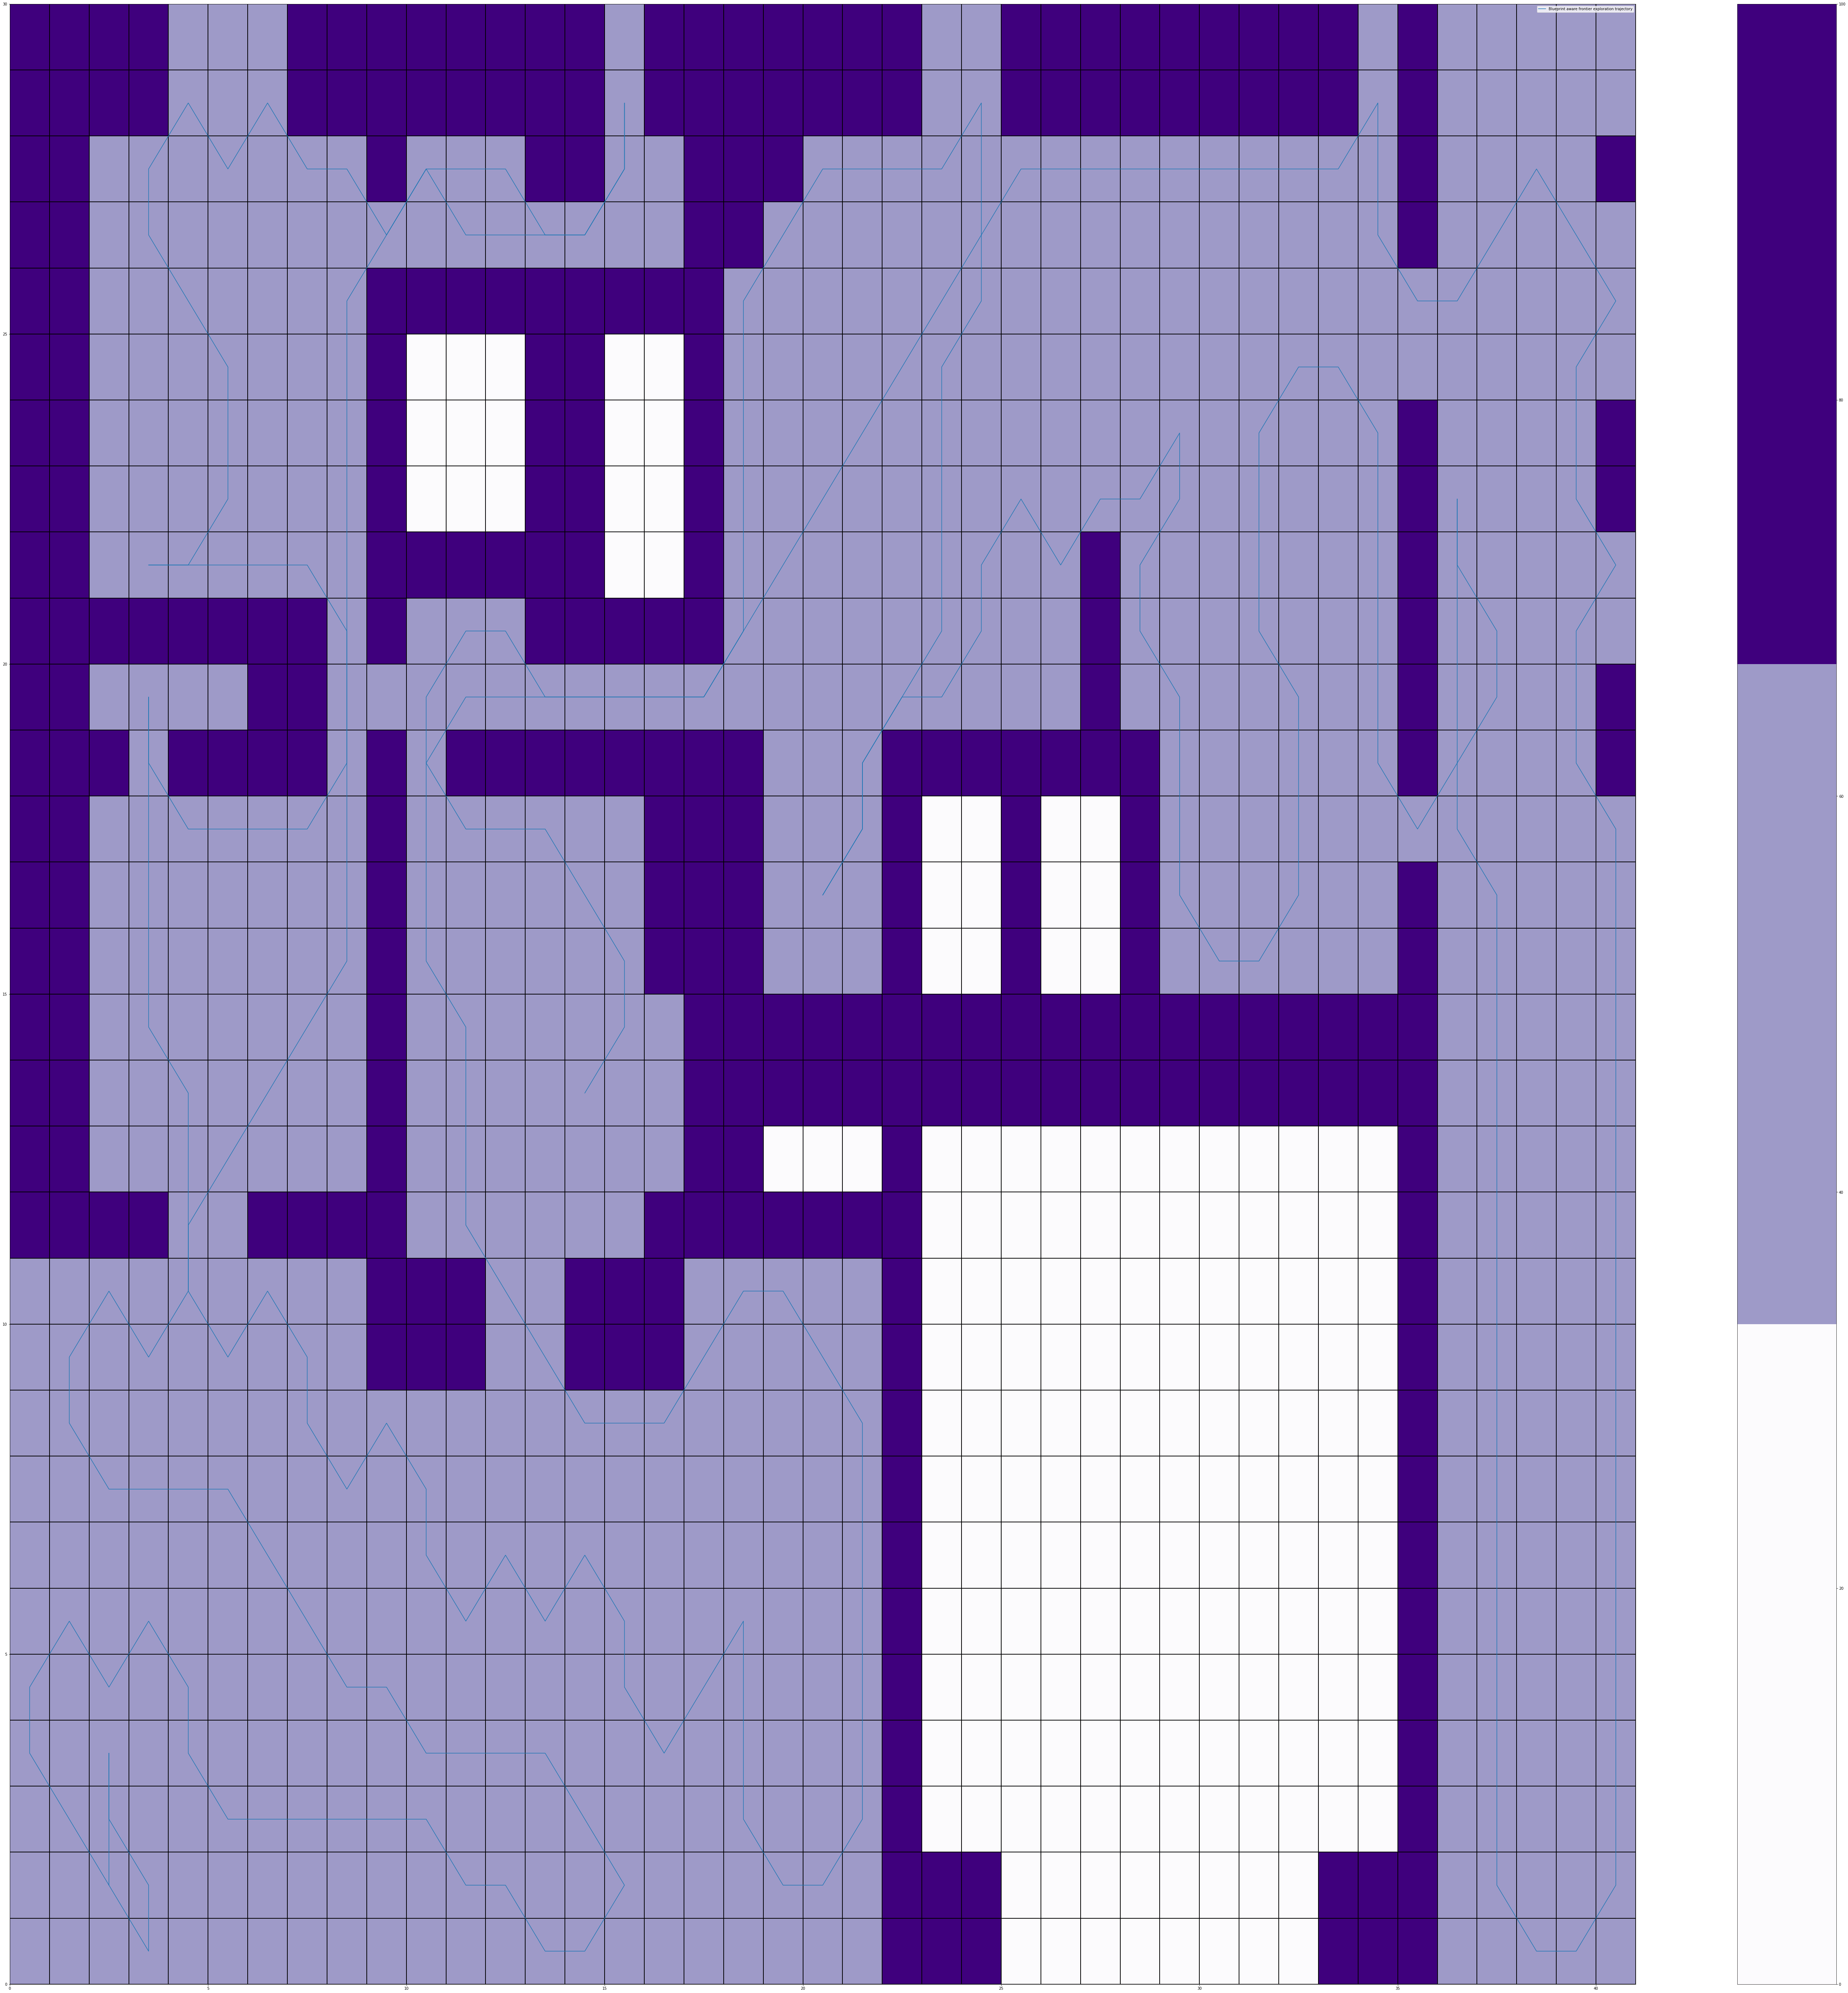

41


In [3]:
import numpy as np
import random

from FrontierExploration.preprocessing.grid.mock_grid import create_mock_grid
from FrontierExploration.preprocessing.trajectory.not_naive_approach import BlueprintAwareFrontierExploration

# grid = create_mock_grid(num_x_cells=20, num_y_cells=20,
#                         cell_size=0.1, occupancy_percentage=50)
empty_cells = grid.get_empty_cells()
start_cell_idx = random.randint(0, len(empty_cells))
start_cell = tuple(empty_cells[start_cell_idx])
p = BlueprintAwareFrontierExploration(grid=grid, start_cell=start_cell)
path = p.solve()

fig = p.plot(figsize=(100,100))
ax = fig.gca()
to_plot = np.asarray(path).T
to_plot = np.add(to_plot, np.ones_like(to_plot) * 0.5)
ax.plot(to_plot[0], to_plot[1],
        label="Blueprint aware frontier exploration trajectory")
plt.legend(loc='best')
print(f"The robot should take {len(path)} steps to explore the grid.")

plt.show()
print(len([a for a in grid]))